## Starter Code

This code file contains a simple starter notebook for the HelpMate AI project.
The project has two options:
- Build and improve HelpMate RAG system
- BYOP (Bring Your Own Project)

Feel free to modify the notebook as per your requirements, based on the choice of your project.


### Part 1

***Problem Statement*** - The goal of the project is to build a RAG system using frameworks such as LlamaIndex or LangChain.


In this case study, we chose to work with the HDFC insurance policy data and employed the LLamaIndex framework for it.

### RAG - System Architecture

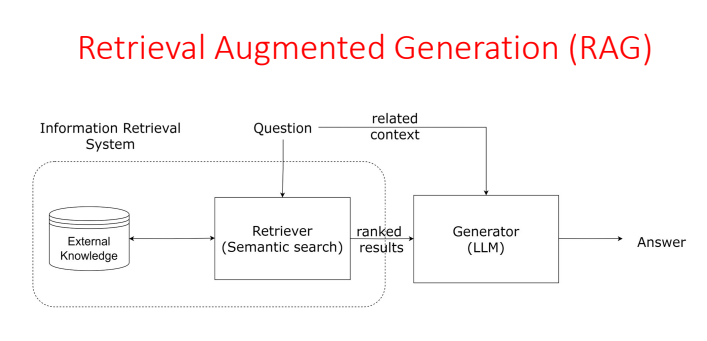

### Part 2 - Solution POC

The basic RAG pipeline in LlamaIndex is illustrated below.

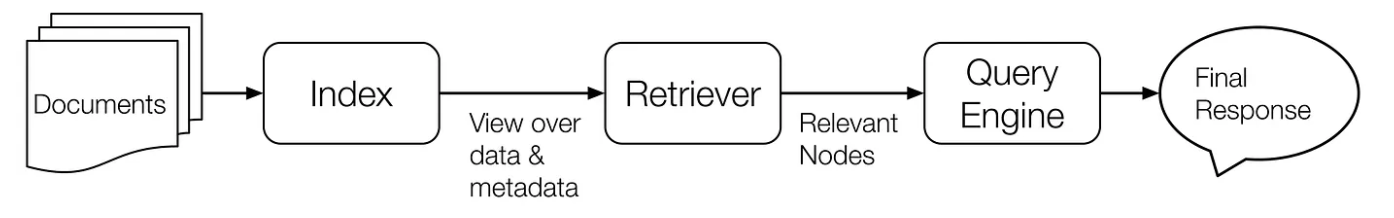

This starter notebook contains the general steps to create an RAG using LlamaIndex framework. Feel free to modify the code as per your requirement.

## **Note:** Please change the the policy document folder and api key file locations appropriately to run the notebook at your end.

**Step 1** : Import the necessary libraries

In [2]:
# Install OpenAI, LlamaIndex
!pip install -U -qq llama-index openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.2 MB/s eta 0:00:00


In [20]:
## Install additional supporting libraries as required

!pip install pdfplumber
!pip install chromadb
!pip install tiktoken
!pip install openai

!pip install pypdf python-dotenv -q
!pip install -q transformers einops accelerate bitsandbytes sentence_transformers
!pip install llama-index -q
!pip install llama-index-llms-huggingface -q
!pip install llama-index-embeddings-huggingface -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.2/853.2 kB 47.4 MB/s eta 0:00:00


In [5]:
# Importing the libraries
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai
import pandas as pd
from pathlib import Path
from operator import itemgetter
import json
import tiktoken
import chromadb
import openai

**Step 2**: Mount your Google Drive and Set the API key

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Set the API key
filepath = "/content/drive/MyDrive/GenAI_Course_Master/"
with open(filepath + "API_key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

Step 3 - Data Loading

Dataset:

- For HelpMate AI project, the insurance documents can be downloaded from the module 'RAG Demonstration' or download the files from the following [link](https://cdn.upgrad.com/uploads/production/8e278245-506c-4c8c-9246-892280692919/Policy+Documents.zip)

- For BYOP project, you may create your own dataset or open-source datasets from [Kaggle](www.kaggle.com)

Use the appropriate document loader for loading the documents.

**NOTE** - No matter how powerful the given data loader is, ensure that your file is properly formatted, and the loader is able to read the file clearly else the query engine might fail.

In [ ]:
# NOTE: This is ONLY necessary in jupyter notebook.
# Details: Jupyter runs an event-loop behind the scenes.
#          This results in nested event-loops when we start an event-loop to make async queries.
#          This is normally not allowed, we use nest_asyncio to allow it for convenience.
import nest_asyncio
nest_asyncio.apply()

In [10]:
# LlamaIndex already has its bundle which comes with OpenAI package included and will work even if we do not import openai separately.
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

In [11]:
from llama_index.core import SimpleDirectoryReader

# Let us take input from a directory
reader = SimpleDirectoryReader(input_dir="/content/drive/MyDrive/HelpMateAI_Project_Files/documents")

In [ ]:
# Use the load_data() method to read the files from the directory
documents = reader.load_data()
# number of files
print(f"Loaded {len(documents)} docs")

Loaded 217 docs


In [ ]:
type(documents)

list

In [ ]:
documents[0]

Document(id_='a90bfe5a-3873-4dc0-83c8-4f95bf51a69b', embedding=None, metadata={'page_label': '1', 'file_name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_path': '/content/drive/MyDrive/HelpMateAI_Project_Files/documents/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_type': 'application/pdf', 'file_size': 1303156, 'creation_date': '2024-06-02', 'last_modified_date': '2024-06-02'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n             Part A \n<<Date>> \n<<Policyholder’s Name>>  \n<<Policyholder’s Address>> \n<<Policyholder’s Contact Number>>  \n \nDear <<Policyholder’s Name>>,  \n \nSub: Your Policy no. <<  >> \nWe are glad to inform you that your proposal has been accepted and the HDFC Life Easy He

Step 4 - Building the query engine

The general process for creating the query_engine is:
- Load the documents
- Create nodes from the documents
- Create index from documents
- Initialise the Query Engine
- Query the index with the prompt
- Generate the response using the retrieved nodes

In [ ]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex as VSI
from IPython.display import display, HTML

# Creating parser

parser = SimpleNodeParser.from_defaults()#(chunk_size = 512)

# Parsing documents into nodes

nodes = parser.get_nodes_from_documents(documents)

# Building index

index = VSI(nodes)

# Building query engine

query_engine = index.as_query_engine()

In [ ]:
query = 'Summarize the smart pension plan policy.'

response = query_engine.query(query)

response.response

"The smart pension plan policy outlines various key aspects such as the option to purchase annuity, flexibility in altering premium payment terms, premium redirection, and the mode of benefit payments. It also emphasizes the policyholder's responsibility for tax compliance and the company's right to recover taxes if necessary. Additionally, the policy highlights the risks associated with investments in unit-linked funds and the absence of guaranteed returns. The entire contract is subject to the terms and conditions specified in the policy document, with the governing law and jurisdiction being in India."

In [ ]:
response.metadata

{'e209de72-aa40-4bea-a925-64db2190cee6': {'page_label': '25',
  'file_name': 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf',
  'file_path': '/content/drive/MyDrive/HelpMateAI_Project_Files/documents/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf',
  'file_type': 'application/pdf',
  'file_size': 983547,
  'creation_date': '2024-06-02',
  'last_modified_date': '2024-06-02'},
 '250cb975-51bf-46c8-93c0-a62c2a05f855': {'page_label': '22',
  'file_name': 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf',
  'file_path': '/content/drive/MyDrive/HelpMateAI_Project_Files/documents/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf',
  'file_type': 'application/pdf',
  'file_size': 983547,
  'creation_date': '2024-06-02',
  'last_modified_date': '2024-06-02'}}

In [ ]:
print('Page No.' + response.source_nodes[0].node.metadata['page_label'] + ' of ' + response.source_nodes[0].node.metadata['file_name'])

Page No.25 of HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf


In [ ]:
print('Similarity score = ' + str(round(response.source_nodes[0].score,2)))

Similarity score = 0.85


Step 5 - Creating a Response Pipeline

A Query Response pipeline encapsulates all the necssary steps to build a RAG pipeline. Modify the functions `query_response` and `initialize_conv()`  below. The `query_response` functions return the query response from the query engine along with the supporting documents and the `initialize_conv()` function creates an interactive chatbot.

In [ ]:
## Query response function
def query_response(user_input):

    response = query_engine.query(user_input)
    file_name = file_name = response.source_nodes[0].node.metadata['file_name'] + " page nos: " + response.source_nodes[0].node.metadata['page_label'] + ", " + response.source_nodes[1].node.metadata['page_label']
    final_response = response.response + "\n You can find more details at " + file_name

    return final_response

In [ ]:
def initialize_conv():
  print("Hi I'm your HelpMate! Feel free to ask me any questions regarding HDFC insurance policies. You can type 'exit' the chat once your doubts are resolved.")
  while True:
    user_input = input()
    if user_input.lower() == 'exit':
      print('Exiting the program... Have a nice day!')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:20px">{response}</p>'))

In [ ]:
initialize_conv()

Hi I'm your HelpMate! Feel free to ask me any questions regarding HDFC insurance policies. You can type 'exit' the chat once your doubts are resolved.
EXIT
Exiting the program... Have a nice day!



**Step 7** - Build a Testing Pipeline

Here we feed a series of questions to the Q/A bot and store the responses along with the feedback on whether it's accurate or not from the user

Create atleast 5 questions and store them in the `questions` list to be queried by the RAG system using the `testing_pipeline` function.

In [ ]:
questions = ["What is the HDFC Life Group term life policy?",
             "What are the plan options for the Poorna Suraksha policy?",
             "What type of surgeries are covered under the HDFC Surgicare plan?"
            ]

In [ ]:
def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please rate the answer as "Good" or "Bad".')
    user_input = input()
    page = query_response(i).split()[-1]
    test_feedback.append((i,query_response(i),page,user_input))

  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Page','Review'])
  return feedback_df

In [ ]:
testing_pipeline(questions)

What is the HDFC Life Group term life policy?
The HDFC Life Group Term Life policy is a non-linked, non-participating Group Life Insurance Policy offered by HDFC Life Insurance Company Limited. It provides coverage for groups such as Employer-Employee groups and Non-Employer-Employee groups, with specific provisions like exclusions related to suicide and optional accidental death benefits. The policy is governed by the laws of India and outlines the terms and conditions under which benefits are payable upon the occurrence of insured events, as detailed in the Policy Schedule and Certificate of Insurance.
 You can find more details at HDFC-Life-Group-Term-Life-Policy.pdf page nos: 20, 4

 Please provide your feedback on the response provided by the bot. ("GOOD"/"BAD")
GOOD
What are the plan options for the Poorna Suraksha policy?
The plan options for the Poorna Suraksha policy include the Additional Sum Assured option and the Settlement Option.
 You can find more details at HDFC-Life-Sa

,Question,Response,Page,Good or Bad
0,What is the HDFC Life Group term life policy?,The HDFC Life Group Term Life policy is a non-...,4,GOOD
1,What are the plan options for the Poorna Surak...,The plan options for the Poorna Suraksha polic...,10,GOOD
2,What type of surgeries are covered under the H...,Cornea transplantation due to Trauma (for each...,2,GOOD


### Part 3 - Additional Steps


3.1 - Building a custom prompt template

You can try building a custom prompt template for improving the generation capabilities of the RAG system.

In [ ]:
# Custom prompt template for improved query response
response = query_engine.query("Summarize the documents")

In [ ]:
response.response

'The documents required for a claim under the policy include a completed claim form with NEFT details and bank account proof, Member Information/Enrollment Form, separate Member Authorization if applicable, all medical reports for diagnosis and treatment of critical illness, all current and past medical records of the Scheme Member, NEFT details with supporting documents of the insured member, and translation of vernacular documents if required. Additionally, for issuance of a duplicate policy, the Master Policyholder needs to submit a notarized original indemnity bond on stamp paper at HDFC Life offices. Proof of age of the Scheme Member is crucial, and if not provided initially, it must be furnished later to avoid issues with coverage and premiums. Eligibility criteria, commencement of insurance, provision of information, and notification of any changes in member details are also outlined in the documents.'

In [ ]:
response.source_nodes[0]

NodeWithScore(node=TextNode(id_='f534dced-7eae-4943-b2fa-836cb083101a', embedding=None, metadata={'page_label': '6', 'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'file_path': '/content/drive/MyDrive/HelpMateAI_Project_Files/documents/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'file_type': 'application/pdf', 'file_size': 1371541, 'creation_date': '2024-06-02', 'last_modified_date': '2024-06-02'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='344bb813-d424-441b-ba9a-966ebc8a6072', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '6', 'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'file_path': '/content/drive

In [ ]:
response.source_nodes[1].node.text

'Page 16 of 31 \n a. Completed claim form, (including NEFT details and bank account proof as specified in the claim \nform) \nb. Member Information/Enrollment Form (MIF) \nc. Separate Member Authorization (if applicable) \nd. All medical reports for diagnosis and treatment of critical Illness \ne. All current and past medical records of Scheme Member \nf. NEFT Details along with supporting Documents of Insured member \ng. Translation of all vernacular documents (if Required) \n \nNote: Depending on the circumstances, further documents may be called for as we deem fit. \n \n3. Issuance of Duplicate Policy: \nThe Master Policyholder may request for a duplicate copy of the Policy at HDFC Life offices along with \nrelevant documents. While making an application for duplicate Master Policy the Master Policyholder is \nrequired to submit a notarized original indemnity bond on stamp paper. \n \n4. Age Admitted \nThe Company has calculated the Premiums under the Policy on the basis of the age 

In [ ]:
retrieved = response.source_nodes[0].node.text + response.source_nodes[1].node.text

In [ ]:
messages = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":f"""Summarize the documents. Check in '{retrieved}' """},
          ]

In [ ]:
response2 = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages)
response2.choices[0].message.content

'The document outlines key definitions and terms related to a Master Policy for insurance coverage for critical illnesses. It explains what Sum Assured, Service, Surrender, and Voluntary Participation mean. It also provides details on the documents required for filing a claim, issuance of a duplicate policy, age admission, eligibility criteria, commencement of insurance, and provision of information. The document emphasizes the importance of providing accurate information and notifying the insurer of any changes promptly.'

3.2 - Recommendations on how to further improve RAG pipeline:

- Based on the testing pipeline's feedback, you can further develop a strategy on how to improve the RAG pipeline further
- This can be through building a better/cleaner dataset, or utilizing better data pre-processing techniques
- If the accuracy is good enough, think of implementing some more use cases and user stories. Maybe a set of users want to do XYZ, and that requirement needs to be implemented in the solution. Think of a proper tool that can enable you to do that.

Additional suggestions for improving the RAG pipeline are listed below:

**Utilizing Suggestion 1** - Using Customized Nodes and LLMs

This can be used if your responses are not accurate or is not being summarized very well



In [13]:
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import VectorStoreIndex as VSI, SimpleDirectoryReader, Settings, PromptTemplate
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

##Initialize the OpenAI model
Settings.llm = OpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=256)

##Initialize the embedding model
Settings.embed_model = OpenAIEmbedding()

## Initialize the node_parser with the custom node settings
Settings.node_parser = SentenceSplitter(chunk_size=512, chunk_overlap=20)

## Initialize the num_output and the context window
Settings.num_output = 512
Settings.context_window = 3900

# Create a VectorStoreIndex from a list of documents using the service context
index = VectorStoreIndex.from_documents(documents)

# Initialize a query engine for the index with a specified similarity top-k value
query_engine = index.as_query_engine(similarity_top_k=3)

In [ ]:
#Query the engine with a specific question
response = query_engine.query("Based on the documents provided, can you generate some questions to test my RAG application?")

In [ ]:
response.response

'What documents might be required when making a claim under the HDFC Life Group Poorna Suraksha policy?\nWhat steps are involved in requesting a duplicate copy of the Master Policy under the HDFC Life Group Poorna Suraksha policy?\nUnder what circumstances can the insurer call for proof of age of the Scheme Member under the HDFC Life Group Poorna Suraksha policy?\nWhat are the eligibility conditions for a person to participate in the Scheme under the HDFC Life Group Poorna Suraksha policy?\nWhat information must the Master Policyholder provide to the insurer before assuring any benefit under the provisions of the HDFC Life Group Poorna Suraksha policy?\nWhat are the provisions regarding the policy not being called into question after three years under Section 45 of the Insurance Act, 1938, as mentioned in the HDFC Life Sanchay Plus policy document?'

In [ ]:
#Query the engine with a specific question
response = query_engine.query("What documents might be required when making a claim under the HDFC Life Group Poorna Suraksha policy?")

In [ ]:
response.response

'When making a claim under the HDFC Life Group Poorna Suraksha policy, the following documents might be required:\n- Completed claim form, including NEFT details and bank account proof\n- Member Information/Enrollment Form (MIF)\n- Separate Member Authorization (if applicable)\n- All medical reports for diagnosis and treatment of critical illness\n- All current and past medical records of Scheme Member\n- NEFT Details along with supporting documents of Insured member\n- Translation of all vernacular documents if required'

In [ ]:
#Query the engine with a specific question
response = query_engine.query("What steps are involved in requesting a duplicate copy of the Master Policy under the HDFC Life Group Poorna Suraksha policy?")

In [ ]:
response.response

'To request a duplicate copy of the Master Policy under the HDFC Life Group Poorna Suraksha policy, the Master Policyholder needs to visit HDFC Life offices along with relevant documents. When applying for a duplicate Master Policy, the Master Policyholder must submit a notarized original indemnity bond on stamp paper.'

In [ ]:
#Query the engine with a specific question
response = query_engine.query("Under what circumstances can the insurer call for proof of age of the Scheme Member under the HDFC Life Group Poorna Suraksha policy?")

In [ ]:
response.response

'The insurer can call for proof of age of the Scheme Member under the HDFC Life Group Poorna Suraksha policy if the proof of age of the Scheme Member has not been provided with the member enrollment form.'

###Testing other models from Hugging Face.

In [21]:
from llama_index.core.llms import ChatMessage
from llama_index.llms.huggingface import HuggingFaceLLM

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [1]:
import logging
import sys

logging.basicConfig(stream = sys.stdout, level = logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream = sys.stdout))

In [14]:
# Setting up system and query wrapper prompts

system_prompt = "You are a Q&A assistant. Your aim is to answer the questions as accurately as possible based on the given instructions and context"

query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|")

In [16]:
documents = SimpleDirectoryReader("/content/drive/MyDrive/HelpMate_AI/Policy+Documents").load_data()

In [17]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [22]:
import torch

# Setting up Microsoft's Phi-3 mini 4k LLM model

llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="microsoft/Phi-3-mini-4k-instruct",
    model_name="microsoft/Phi-3-mini-4k-instruct",
    device_map="auto",
    model_kwargs={"torch_dtype": torch.float16, "load_in_8bit":True}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/931 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Embedding model 1

In [24]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

# Setting up two types of embedding models


embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-mpnet-base-v2")
#embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")
Settings.embed_model = embed_model
Settings.llm = llm
Settings.chunk_size = 1024

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [25]:
index = VSI.from_documents(documents)
query_engine = index.as_query_engine()
response = query_engine.query("What are the plan options for the Poorna Suraksha policy?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
You are not running the flash-attention implementation, expect numerical differences.


In [26]:
# Response for the sentence-transformers/all-mpnet-base-v2 embedding model

response.response

'>The Poorna Suraksha policy offers the following plan options:\n\n1. Additional Sum Assured option: The Scheme Member can opt to increase their cover during the Coverage Term. This option is subject to certain conditions, such as not being taken in the event of any claim by the Scheme Member, an additional premium being charged, and the Scheme Member satisfying the eligibility criteria set out in Part F Clause 5. The Scheme Member also has the option to surrender the availed additional Sum Assured option at any time during the remaining Coverage Term.\n\n2. Settlement Option: The Nominee/Scheme Member can choose to receive the plan benefit in instalments over a chosen period of 5 to 15 years instead of a lump sum amount. The instalment amount will be calculated based on the frequency chosen by the Nominee/Scheme Member (yearly, half-yearly, quarterly, or monthly) and will be a level amount. The interest rate used to compute the instalment amount is equal to the annualized yield on 10-

Embedding model 2

In [27]:
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")
Settings.embed_model = embed_model
Settings.llm = llm
Settings.chunk_size = 1024

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [28]:
# Response for the BAAI/bge-small-en-v1.5 embedding model

response.response

'>The Poorna Suraksha policy offers the following plan options:\n\n1. Additional Sum Assured option: The Scheme Member can opt to increase their cover during the Coverage Term. This option is subject to certain conditions, such as not being taken in the event of any claim by the Scheme Member, an additional premium being charged, and the Scheme Member satisfying the eligibility criteria set out in Part F Clause 5. The Scheme Member also has the option to surrender the availed additional Sum Assured option at any time during the remaining Coverage Term.\n\n2. Settlement Option: The Nominee/Scheme Member can choose to receive the plan benefit in instalments over a chosen period of 5 to 15 years instead of a lump sum amount. The instalment amount will be calculated based on the frequency chosen by the Nominee/Scheme Member (yearly, half-yearly, quarterly, or monthly) and will be a level amount. The interest rate used to compute the instalment amount is equal to the annualized yield on 10-

**Utilizing Suggestion 2** - [Sub Question Query Engine](https://docs.llamaindex.ai/en/stable/examples/query_engine/sub_question_query_engine/)

In [ ]:
import nest_asyncio

nest_asyncio.apply()

In [ ]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core.tools import QueryEngineTool, ToolMetadata
from llama_index.core.query_engine import SubQuestionQueryEngine
from llama_index.core.callbacks import CallbackManager, LlamaDebugHandler
from llama_index.core import Settings

In [ ]:
# Using the LlamaDebugHandler to print the trace of the sub questions
# captured by the SUB_QUESTION callback event type
llama_debug = LlamaDebugHandler(print_trace_on_end=True)
callback_manager = CallbackManager([llama_debug])

Settings.callback_manager = callback_manager

In [ ]:
# load data
document_data = SimpleDirectoryReader(input_dir="/content/drive/MyDrive/HelpMateAI_Project_Files/documents").load_data()

# build index and query engine
vector_query_engine = VectorStoreIndex.from_documents(
    document_data,
    use_async=True,
).as_query_engine()

**********
Trace: index_construction
    |_embedding -> 1.883303 seconds
    |_embedding -> 2.099796 seconds
    |_embedding -> 2.198447 seconds
**********


In [ ]:
# setup base query engine as tool
query_engine_tools = [
    QueryEngineTool(
        query_engine=vector_query_engine,
        metadata=ToolMetadata(
            name="document_data",
            description="Policy Documents",
        ),
    ),
]

query_engine_1 = SubQuestionQueryEngine.from_defaults(
    query_engine_tools=query_engine_tools,
    use_async=True,
)

In [ ]:
response = query_engine_1.query(
    "What are the key terms and conditions in the HDFC policy documents?"
)

Generated 2 sub questions.
[document_data] Q: What are the key terms in the HDFC policy documents?
[document_data] Q: What are the conditions specified in the HDFC policy documents?
[document_data] A: Key terms in the HDFC policy documents include Policy Provisions, terms and conditions, Jurisdiction, Notices, Amendments, Regulations, Laws, IRDAI approval, address change procedure, Anti-money Laundering/Know Your Customer norms, and the requirement for written communication for notices, directions, or instructions.
[document_data] A: The conditions specified in the HDFC policy documents include the right to change policy provisions/terms and conditions in accordance with regulations, obtaining approval from IRDAI for material changes, jurisdiction governed by Indian laws, requirements for notices to be in writing and delivered through specified means, the need for communication of address changes by the policyholder, documents required for claim processing, issuance of duplicate policy

In [ ]:
response.response

'The key terms and conditions in the HDFC policy documents include Policy Provisions, Jurisdiction, Notices, Amendments, Regulations, Laws, IRDAI approval, address change procedure, Anti-money Laundering/Know Your Customer norms, and the requirement for written communication for notices, directions, or instructions. Additionally, the conditions specified encompass the right to change policy provisions/terms and conditions, obtaining IRDAI approval for material changes, jurisdiction governed by Indian laws, requirements for written notices, communication of address changes, claim processing documentation, issuance of duplicate policies, age admission process, scheme participation eligibility criteria, insurance commencement based on eligibility and premium payment, provision of information by the master policyholder, and the obligation to inform the insurer of any changes in scheme member details within a specified timeframe.'

In [ ]:
# iterate through sub_question items captured in SUB_QUESTION event
from llama_index.core.callbacks import CBEventType, EventPayload

for i, (start_event, end_event) in enumerate(
    llama_debug.get_event_pairs(CBEventType.SUB_QUESTION)
):
    qa_pair = end_event.payload[EventPayload.SUB_QUESTION]
    print("Sub Question " + str(i) + ": " + qa_pair.sub_q.sub_question.strip())
    print("Answer: " + qa_pair.answer.strip())
    print("====================================")

Sub Question 0: What are the key terms in the HDFC policy documents?
Answer: Key terms in the HDFC policy documents include Policy Provisions, terms and conditions, Jurisdiction, Notices, Amendments, Regulations, Laws, IRDAI approval, address change procedure, Anti-money Laundering/Know Your Customer norms, and the requirement for written communication for notices, directions, or instructions.
Sub Question 1: What are the conditions specified in the HDFC policy documents?
Answer: The conditions specified in the HDFC policy documents include the right to change policy provisions/terms and conditions in accordance with regulations, obtaining approval from IRDAI for material changes, jurisdiction governed by Indian laws, requirements for notices to be in writing and delivered through specified means, the need for communication of address changes by the policyholder, documents required for claim processing, issuance of duplicate policy with specific requirements, age admission process, eli

**Suggetion 3**: [Build RAG using Agentic Systems](https://docs.llamaindex.ai/en/stable/examples/query_engine/knowledge_graph_rag_query_engine/)

**Suggestion 4**: [Retriever Router Query Engine](https://docs.llamaindex.ai/en/stable/examples/query_engine/RetrieverRouterQueryEngine/)

**Suggestion 5**: [FLARE](https://docs.llamaindex.ai/en/stable/examples/query_engine/flare_query_engine/)

**Suggestion 6**: [HyDE](https://docs.llamaindex.ai/en/stable/examples/query_transformations/HyDEQueryTransformDemo/)


**Suggestion 7**: Use different loaders for parsing documents such as [Unstructured Reader](https://docs.llamaindex.ai/en/stable/api_reference/readers/file/?h=unstructured#llama_index.readers.file.UnstructuredReader) or [PyMuPDFReader](https://docs.llamaindex.ai/en/stable/api_reference/readers/file/?h=unstructured#llama_index.readers.file.PyMuPDFReader)

You can refer to the following links for additional information on improving the RAG pipeline:
- https://docs.llamaindex.ai/en/stable/optimizing/basic_strategies/basic_strategies.html
- https://docs.llamaindex.ai/en/stable/optimizing/production_rag/
- https://docs.llamaindex.ai/en/stable/optimizing/agentic_strategies/agentic_strategies/